# Simple Keras (Tensorflow) training 
Based on - https://www.youtube.com/watch?v=qFJeN9V1ZsI&t=398s (DeepLizard tutorial)

In this training we will create a small neural network (3 layers)

## Data Preparation

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50) :
    # 5% of young individuals who have side effects
    young_age = randint(10, 59)
    train_samples.append(young_age)
    train_labels.append(1)
    
    # 5% of old individuals who do not have side effects
    old_age = randint(60, 90)
    train_samples.append(old_age)
    train_labels.append(0)
    
for i in range(950) :
    # 95% of young individuals who dont have side effects
    young_age = randint(10, 59)
    train_samples.append(young_age)
    train_labels.append(0)
    
    # 95% of old individuals who do have side effects
    old_age = randint(60, 90)
    train_samples.append(old_age)
    train_labels.append(1)    

In [4]:
import pandas as pd

In [5]:
dict = {'AGE' : train_samples, 'SIDE_EFFECTS': train_labels}
train_data = pd.DataFrame(dict)
train_data.head()

,AGE,SIDE_EFFECTS
0,42,1
1,86,0
2,49,1
3,88,0
4,31,1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
train_samples_r = train_samples.reshape(-1, 1)
scaled_train_samples = scaler.fit_transform(train_samples_r)
scaled_train_samples

array([[0.1  ],
       [0.275],
       [0.05 ],
       ...,
       [0.025],
       [0.875],
       [0.55 ]])

## Prepare Sequential Model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

print("TF version:", tf.__version__)
# print("Hub version:", hub.__version__)

TF version: 2.8.0


In [9]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0 :
    print("GPU is available") 
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU is unavaillable!") 

GPU is unavaillable!


2022-03-16 12:57:57.183708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 12:57:57.235606: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64
2022-03-16 12:57:57.235622: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model = Sequential([
    Dense(units=16, activation='relu', input_shape=(1,)),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

2022-03-16 12:57:57.257766: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# validation_split - creates validation set from the training set (validation data is no longer used as training data)
# shuffle - shuffles the training data set after splitting it into train & validation sets so this is not optimal solution!!!

model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.2, batch_size=10, epochs=50, shuffle=True, verbose=2)

Epoch 1/50
160/160 - 1s - loss: 0.7087 - accuracy: 0.4625 - val_loss: 0.6970 - val_accuracy: 0.4950 - 529ms/epoch - 3ms/step
Epoch 2/50
160/160 - 0s - loss: 0.6859 - accuracy: 0.6463 - val_loss: 0.6709 - val_accuracy: 0.7450 - 177ms/epoch - 1ms/step
Epoch 3/50
160/160 - 0s - loss: 0.6558 - accuracy: 0.7725 - val_loss: 0.6381 - val_accuracy: 0.8250 - 180ms/epoch - 1ms/step
Epoch 4/50
160/160 - 0s - loss: 0.6276 - accuracy: 0.8138 - val_loss: 0.6122 - val_accuracy: 0.8250 - 163ms/epoch - 1ms/step
Epoch 5/50
160/160 - 0s - loss: 0.6022 - accuracy: 0.8219 - val_loss: 0.5861 - val_accuracy: 0.8325 - 161ms/epoch - 1ms/step
Epoch 6/50
160/160 - 0s - loss: 0.5766 - accuracy: 0.8219 - val_loss: 0.5598 - val_accuracy: 0.8500 - 164ms/epoch - 1ms/step
Epoch 7/50
160/160 - 0s - loss: 0.5508 - accuracy: 0.8344 - val_loss: 0.5330 - val_accuracy: 0.8600 - 175ms/epoch - 1ms/step
Epoch 8/50
160/160 - 0s - loss: 0.5248 - accuracy: 0.8506 - val_loss: 0.5075 - val_accuracy: 0.8600 - 185ms/epoch - 1ms/step


## Predictions

In [18]:
test_labels = []
test_samples = []

In [19]:
for i in range(10) :
    # 5% of young individuals who have side effects
    young_age = randint(10, 59)
    test_samples.append(young_age)
    test_labels.append(1)
    
    # 5% of old individuals who do not have side effects
    old_age = randint(60, 90)
    test_samples.append(old_age)
    test_labels.append(0)
    
for i in range(90) :
    # 95% of young individuals who dont have side effects
    young_age = randint(10, 59)
    test_samples.append(young_age)
    test_labels.append(0)
    
    # 95% of old individuals who do have side effects
    old_age = randint(60, 90)
    test_samples.append(old_age)
    test_labels.append(1)
    
    


In [20]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)    

test_samples_r = test_samples.reshape(-1, 1)
scaled_test_samples = scaler.fit_transform(test_samples_r)
scaled_test_samples[:5] 

array([[0.775 ],
       [0.1625],
       [0.8125],
       [0.1375],
       [0.4375]])

In [21]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
predictions[:5]

array([[0.09603932, 0.9039607 ],
       [0.97844315, 0.02155689],
       [0.06511824, 0.93488175],
       [0.97865915, 0.02134088],
       [0.87460613, 0.12539388]], dtype=float32)

In [22]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels[:5]

array([1, 0, 1, 0, 0])

## Confusion Matrix

In [31]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
c_matrix = confusion_matrix(y_true=test_labels, y_pred=predicted_labels)

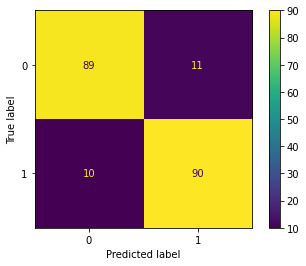

In [30]:
ConfusionMatrixDisplay.from_predictions(y_true=test_labels, y_pred=predicted_labels)
# plot_confusion_matrix(c_matrix)

## Save & Load a Model

### 1. model.save()

This function saves the following elements:
* the architecture of the model (allowing to recreate it later)
* the weights of the model
* the training configuration (optimizer and loss function)
* the state of the optimizer, allowing to resume training at the point where it was left

In [34]:
model.save('models/model1.h5') # this will create the directory if it does not exist

In [36]:
from tensorflow.keras.models import load_model
new_model = load_model('models/model1.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [39]:
weights = new_model.get_weights()
print(type(weights))
print(weights[:1])

<class 'list'>
[array([[-0.07260936, -0.58577996, -0.11403081,  0.13830782,  0.48272288,
         0.06178328, -0.48325956,  0.6217374 , -0.19210812,  0.3637287 ,
         0.31784195,  0.66511494, -0.03774904, -0.3272515 ,  0.5223413 ,
        -0.11039177]], dtype=float32)]


### 2. model.to_json() or model.to_saml()

This is used to save only the architecture of the model without its weights and training configuration 

In [40]:
model_as_json = model.to_json()
model_as_json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [41]:
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(model_as_json)
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

In [42]:
model.save_weights('models/model1_weights.h5')
model_architecture.load_weights('models/model1_weights.h5')
weights = model_architecture.get_weights()
print(weights[:1])

[array([[-0.07260936, -0.58577996, -0.11403081,  0.13830782,  0.48272288,
         0.06178328, -0.48325956,  0.6217374 , -0.19210812,  0.3637287 ,
         0.31784195,  0.66511494, -0.03774904, -0.3272515 ,  0.5223413 ,
        -0.11039177]], dtype=float32)]
